<a href="https://colab.research.google.com/github/fbrunosantos/Analise_ENEM/blob/main/ENEM_RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de dados ENEM**


- Dados socioeconômicos do ENEM de 2014;
- Foram utilizados dados de 100.000 candidatos;

 **Objetivo:**
- Questões socioeconômicas do candidato estão relacionadas à escolha da lingua Espanhola no ENEM?

- **As questões escolhidas foram:**
- Se o candidato tem acesso à computador e internet em casa;
- Se o candidato realizou cursos de Informática, Língua Estrangeira, Pré-vestibular ou outro curso superior.



### **Importando as bibliotecas**

In [1]:
#Frameworks

#dados
import pandas as pd
import numpy as np

#graficos
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#ajustes no pandas
pd.set_option('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

#ajustes no matplpotlib
plt.rcParams['figure.figsize']= (15, 6)
plt.style.use('seaborn-darkgrid')


### **Análise exploratória dos dados**

Os dados foram retirados da base de microdados do ENEM, são referentes ao ano de 2014 e foram usadas na análise dados de 100.000 candidatos.

In [6]:
dados = pd.read_csv('/content/drive/MyDrive/enem_regressao logistica/tabela2014.csv')
display(dados.shape)
display(dados.head())
display(dados.tail())

(100000, 14)

,NU_INSCRICAO,NU_ANO,TP_ESCOLA,TP_ENSINO,SG_UF_PROVA,TP_PRESENCA_LC,NU_NOTA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
0,140005042784,2014,NaN,NaN,SE,1,414.2,1,D,D,B,B,B,B
1,140005042785,2014,NaN,NaN,CE,1,521.3,1,A,A,NaN,NaN,NaN,NaN
2,140005042786,2014,1.0,1.0,RS,1,474.8,1,A,A,B,B,B,B
3,140005042787,2014,1.0,1.0,RS,1,494.0,1,B,A,B,B,B,A
4,140005042788,2014,1.0,1.0,PR,1,445.1,0,A,A,B,B,B,A


,NU_INSCRICAO,NU_ANO,TP_ESCOLA,TP_ENSINO,SG_UF_PROVA,TP_PRESENCA_LC,NU_NOTA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
99995,140000137933,2014,1.0,2.0,RJ,1,557.0,0,B,A,A,A,A,B
99996,140000137934,2014,1.0,1.0,AM,0,NaN,1,A,A,B,B,B,A
99997,140000137935,2014,NaN,NaN,PB,1,497.2,1,D,A,NaN,NaN,NaN,NaN
99998,140000137936,2014,2.0,1.0,CE,1,599.8,1,A,A,A,A,B,B
99999,140000137937,2014,2.0,1.0,AC,1,554.6,1,C,A,B,A,A,A


In [7]:
#Verificando as colunas da base
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_ESCOLA', 'TP_ENSINO', 'SG_UF_PROVA',
       'TP_PRESENCA_LC', 'NU_NOTA_LC', 'TP_LINGUA', 'ACESSO_PC',
       'ACESSO_INTERNET', 'CURSO_VEST', 'CURSO_SUPERIOR', 'CURSO_LINGUA',
       'CURSO_INFO'],
      dtype='object')

In [8]:
dados.nunique()

NU_INSCRICAO       100000
NU_ANO                  1
TP_ESCOLA               2
TP_ENSINO               3
SG_UF_PROVA            27
TP_PRESENCA_LC          3
NU_NOTA_LC           3822
TP_LINGUA               2
ACESSO_PC               4
ACESSO_INTERNET         4
CURSO_VEST              2
CURSO_SUPERIOR          2
CURSO_LINGUA            2
CURSO_INFO              2
dtype: int64

- A base tem 100000 linhas e 14 colunas;
- Algumas colunas não são relevantes para a análise pretendida;
- As colunas referentes a realização de cursos e acesso a internet e computador serão tratadas para identificar dados nulos.
- As colunas relevantes também serão convertidas para valores booleanos;

**Para facilitar a análise um dataframe será gerado somente com as colunas relevantes inicialmente.**

In [9]:
df = dados[['TP_PRESENCA_LC', 'TP_LINGUA', 
            'ACESSO_PC', 'ACESSO_INTERNET','CURSO_VEST',
            'CURSO_SUPERIOR', 'CURSO_LINGUA', 'CURSO_INFO']]

In [10]:
df.head()

,TP_PRESENCA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
0,1,1,D,D,B,B,B,B
1,1,1,A,A,NaN,NaN,NaN,NaN
2,1,1,A,A,B,B,B,B
3,1,1,B,A,B,B,B,A
4,1,0,A,A,B,B,B,A


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   TP_PRESENCA_LC   100000 non-null  int64 
 1   TP_LINGUA        100000 non-null  int64 
 2   ACESSO_PC        100000 non-null  object
 3   ACESSO_INTERNET  100000 non-null  object
 4   CURSO_VEST       73448 non-null   object
 5   CURSO_SUPERIOR   73448 non-null   object
 6   CURSO_LINGUA     73448 non-null   object
 7   CURSO_INFO       73448 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


In [12]:
df.isnull().sum()

TP_PRESENCA_LC         0
TP_LINGUA              0
ACESSO_PC              0
ACESSO_INTERNET        0
CURSO_VEST         26552
CURSO_SUPERIOR     26552
CURSO_LINGUA       26552
CURSO_INFO         26552
dtype: int64

- Os valores nulos parecem ser nos mesmos candidatos e se concentram nas colunas sobre os cursos.
- Como esses dados socioeconômicos são a base da nossa análise sera realizada a limpeza e tratamento desses dados.



### **Limpeza e tratamento dos dados**

In [13]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73448 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TP_PRESENCA_LC   73448 non-null  int64 
 1   TP_LINGUA        73448 non-null  int64 
 2   ACESSO_PC        73448 non-null  object
 3   ACESSO_INTERNET  73448 non-null  object
 4   CURSO_VEST       73448 non-null  object
 5   CURSO_SUPERIOR   73448 non-null  object
 6   CURSO_LINGUA     73448 non-null  object
 7   CURSO_INFO       73448 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.0+ MB


- O numero de não nulos se igualou em todas as colunas, o que sugere que os dados nulos realmente se tratavam dos mesmos candidatos que não responderam as questões socioeconômicas sobre cursos realizados.

In [15]:
display(df.head())
display(df.tail())

,TP_PRESENCA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
0,1,1,D,D,B,B,B,B
2,1,1,A,A,B,B,B,B
3,1,1,B,A,B,B,B,A
4,1,0,A,A,B,B,B,A
6,0,0,D,D,B,B,A,A


,TP_PRESENCA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
99994,1,0,A,A,B,B,A,A
99995,1,0,B,A,A,A,A,B
99996,0,1,A,A,B,B,B,A
99998,1,1,A,A,A,A,B,B
99999,1,1,C,A,B,A,A,A


In [16]:
#Tranformando os dados do questionário socioeconômico em booleanos.
#Serão considerados apenas 'sim' e 'não', a quantidade (no caso dos computadores 
#e acesso a internet) não será considerada.

df['ACESSO_PC'] = df['ACESSO_PC'].map({'D': 0, 'A': 1, 'B': 1, 'C': 1})
df['ACESSO_INTERNET'] = df['ACESSO_INTERNET'].map({'D': 0, 'A': 1, 'B': 1, 'C': 1})
df['CURSO_VEST'] = df['CURSO_VEST'].map({'A': 1, 'B': 0})
df['CURSO_SUPERIOR'] = df['CURSO_SUPERIOR'].map({'A': 1, 'B': 0})
df['CURSO_LINGUA'] = df['CURSO_LINGUA'].map({'A': 1, 'B': 0})
df['CURSO_INFO'] = df['CURSO_INFO'].map({'A': 1, 'B': 0})

In [17]:
df.head()

,TP_PRESENCA_LC,TP_LINGUA,ACESSO_PC,ACESSO_INTERNET,CURSO_VEST,CURSO_SUPERIOR,CURSO_LINGUA,CURSO_INFO
0,1,1,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0
3,1,1,1,1,0,0,0,1
4,1,0,1,1,0,0,0,1
6,0,0,0,0,0,0,1,1


### **Aplicando o modelo de Regressão Logística**

In [18]:
X = df[['TP_PRESENCA_LC', 'ACESSO_PC', 'ACESSO_INTERNET','CURSO_VEST','CURSO_SUPERIOR', 'CURSO_LINGUA', 'CURSO_INFO']]
Y = df['TP_LINGUA']

In [21]:
#divisão dos dados em teste e treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_treino, Y_treino)

Y_pred= logistic_regression.predict(X_teste)


In [23]:
#verificando a acurácia do modelo
logistic_regression.score(X_teste, Y_teste)

0.6402087587928296

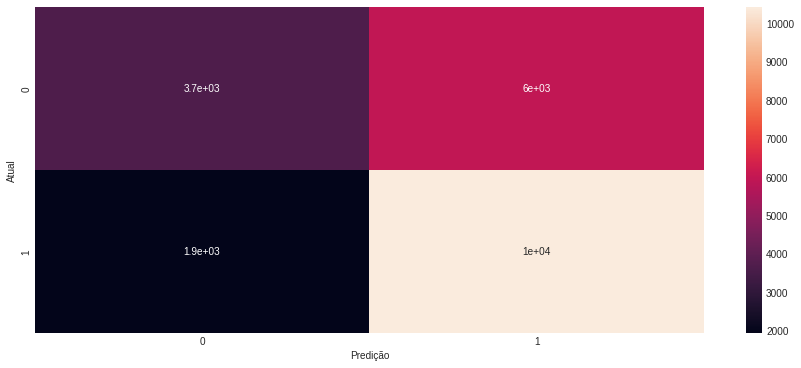

In [25]:
#verificando a acurácia do modelo
confusion_matrix = pd.crosstab(Y_teste, Y_pred, rownames=['Atual'],colnames = ['Predição'])
sns.heatmap(confusion_matrix, annot=True)

In [27]:
print('Acurácia: ', metrics.accuracy_score(Y_teste, Y_pred))
plt.show()

Acurácia:  0.6402087587928296


In [30]:
from sklearn.metrics import roc_curve

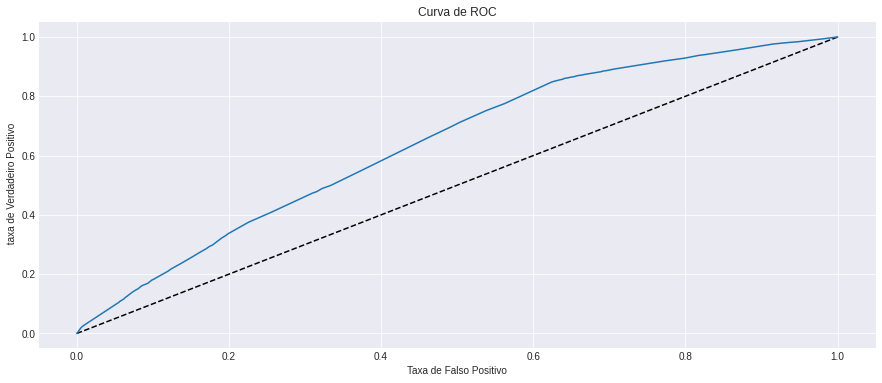

In [32]:
# computa probabilidades
y_pred_prob = logistic_regression.predict_proba(X_teste)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(Y_teste, y_pred_prob)

# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel(' taxa de Verdadeiro Positivo')
plt.title('Curva de ROC')
plt.show()

- **Testando nosso modelo**

In [48]:
teste_modelo1 = {'TP_PRESENCA_LC':1,'ACESSO_PC':0, 'ACESSO_INTERNET':0,'CURSO_VEST':1,
            'CURSO_SUPERIOR':1, 'CURSO_LINGUA':0, 'CURSO_INFO':0}

dtf = pd.DataFrame(data = teste_modelo1, index=[0])
print(dtf)
resultado = logistic_regression.predict(dtf)

def resultado_modelo(resultado):
  if resultado == 1:
    print(' ')
    print('De acordo com os dados: o aluno escolheria Espanhol')
  else:
    print(' ')
    print('De acordo com os dados: o aluno NÃO escolheria Espanhol')

resultado_modelo(resultado)

   TP_PRESENCA_LC  ACESSO_PC  ACESSO_INTERNET  CURSO_VEST  CURSO_SUPERIOR  \
0               1          0                0           1               1   

   CURSO_LINGUA  CURSO_INFO  
0             0           0  
 
De acordo com os dados: o aluno escolheria Espanhol


In [50]:
teste_modelo2 = {'TP_PRESENCA_LC':1,'ACESSO_PC':1, 'ACESSO_INTERNET':0,'CURSO_VEST':1,
            'CURSO_SUPERIOR':1, 'CURSO_LINGUA':1, 'CURSO_INFO':1}

dtf = pd.DataFrame(data = teste_modelo2, index=[0])
print(dtf)
resultado = logistic_regression.predict(dtf)

def resultado_modelo(resultado):
  if resultado == 1:
    print(' ')
    print('De acordo com os dados: o aluno escolheria Espanhol')
  else:
    print(' ')
    print('De acordo com os dados: o aluno NÃO escolheria Espanhol')

resultado_modelo(resultado)

   TP_PRESENCA_LC  ACESSO_PC  ACESSO_INTERNET  CURSO_VEST  CURSO_SUPERIOR  \
0               1          1                0           1               1   

   CURSO_LINGUA  CURSO_INFO  
0             1           1  
 
De acordo com os dados: o aluno NÃO escolheria Espanhol
